In [74]:
import pandas as pd
import openpyxl
from openpyxl import Workbook
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정


In [129]:
# pandas가 알아서 엑셀 읽어서 데이터 만들고 딴다라 다 함
export = pd.read_excel('./data/수산물_수출입_품종별.xlsx', index_col = 0)  # 첫번째 열(어종)을 인덱스로 수출 데이터 읽기


In [72]:
export.index

Index(['김', '참치', '명태', '대구', '기타어류', '어류가공품', '기타게', '이빨고기', '연어', '굴', '고등어',
       '전복', '삼치', '오징어', '넙치', '기타수산물분', '기타갑각류', '게살', '기타연체동물', '붕장어', '미역',
       '해삼', '어란', '전갱이', '청어', '해파리', '새우', '기타해조류', '왕게', '톳', '기타',
       '합   계'],
      dtype='object', name='어종')

      어종    년도        어획량
13   오징어  2017  22637.601
45   오징어  2018   7493.775
77   오징어  2019   8168.163
109  오징어  2020   7172.321
141  오징어  2021  21726.761
173  오징어  2022  15797.648


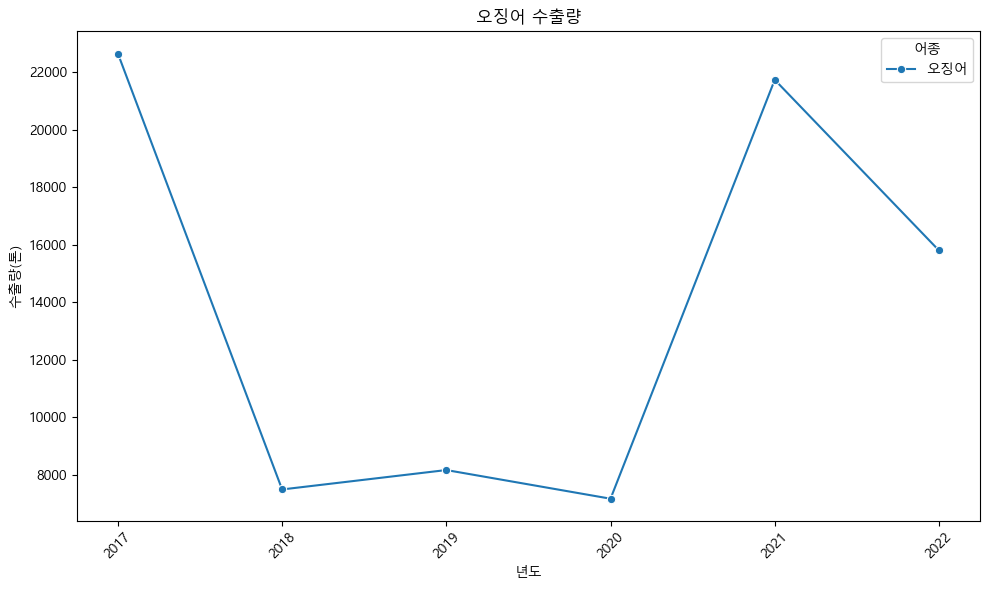

In [96]:
# 오징어 라인 그래프
export_reverse = export.reset_index().melt(id_vars = ['어종'], var_name = '년도', value_name = '어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
squid_data = export_reverse[export_reverse['어종'] == '오징어'] # 오징어에 대한 데이터만
print(squid_data)
# 선 그래프 그리기
plt.figure(figsize = (10, 6))
sns.lineplot(data=squid_data, x = '년도', y = '어획량', hue = '어종', marker = 'o')

# 그래프 꾸미기
plt.title('오징어 수출량')
plt.xlabel('년도')
plt.ylabel('수출량(톤)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전
#plt.legend(title='어종')

# 그래프 표시
plt.tight_layout()
plt.show()

      어종    년도        어획량
25   해파리  2017    279.346
57   해파리  2018   1470.535
89   해파리  2019   2065.449
121  해파리  2020   1492.270
153  해파리  2021   8353.228
185  해파리  2022  14049.191


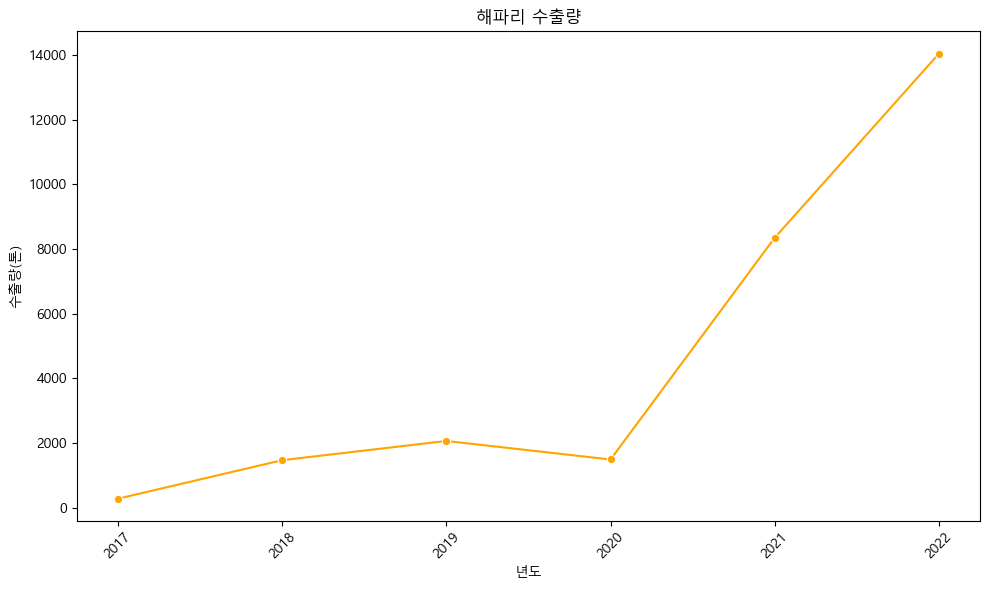

In [124]:
# 해파리 라인 그래프
export_reverse = export.reset_index().melt(id_vars = ['어종'], var_name = '년도', value_name ='어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
jellyfish_data = export_reverse[export_reverse['어종'] == '해파리'] # 해파리에 대한 데이터만
print(jellyfish_data)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=jellyfish_data, x = '년도', y = '어획량', marker = 'o', color = 'orange')

# 그래프 꾸미기
plt.title('해파리 수출량')
plt.xlabel('년도')
plt.ylabel('수출량(톤)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전
#plt.legend(title='어종')

# 그래프 표시
plt.tight_layout()
plt.show()

      어종    년도        어획량
13   오징어  2017  22637.601
25   해파리  2017    279.346
45   오징어  2018   7493.775
57   해파리  2018   1470.535
77   오징어  2019   8168.163
89   해파리  2019   2065.449
109  오징어  2020   7172.321
121  해파리  2020   1492.270
141  오징어  2021  21726.761
153  해파리  2021   8353.228
173  오징어  2022  15797.648
185  해파리  2022  14049.191


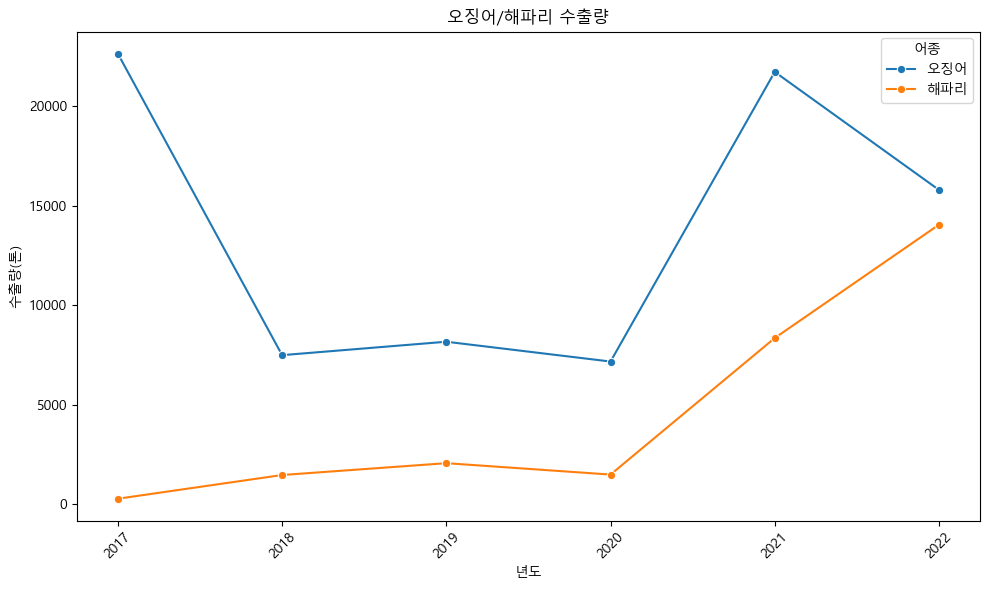

In [ ]:
# 해파리 라인 그래프
export_reverse = export.reset_index().melt(id_vars=['어종'], var_name='년도', value_name='어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
squid_jelly_data = export_reverse[export_reverse['어종'].isin(['오징어', '해파리'])] # 해파리에 대한 데이터만
print(squid_jelly_data)

# 선 그래프 그리기
plt.figure(figsize = (10, 6))
sns.lineplot(data=squid_jelly_data, x = '년도', y = '어획량', hue = '어종', marker = 'o')

# 그래프 꾸미기
plt.title('오징어/해파리 수출량')
plt.xlabel('년도')
plt.ylabel('수출량(톤)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전
#plt.legend(title='어종')

# 그래프 표시
plt.tight_layout()
plt.show()

     어종    년도         어획량
31   합계  2017  539512.003
63   합계  2018  632133.689
95   합계  2019  687534.040
127  합계  2020  614643.620
159  합계  2021  813169.431
191  합계  2022  926296.054


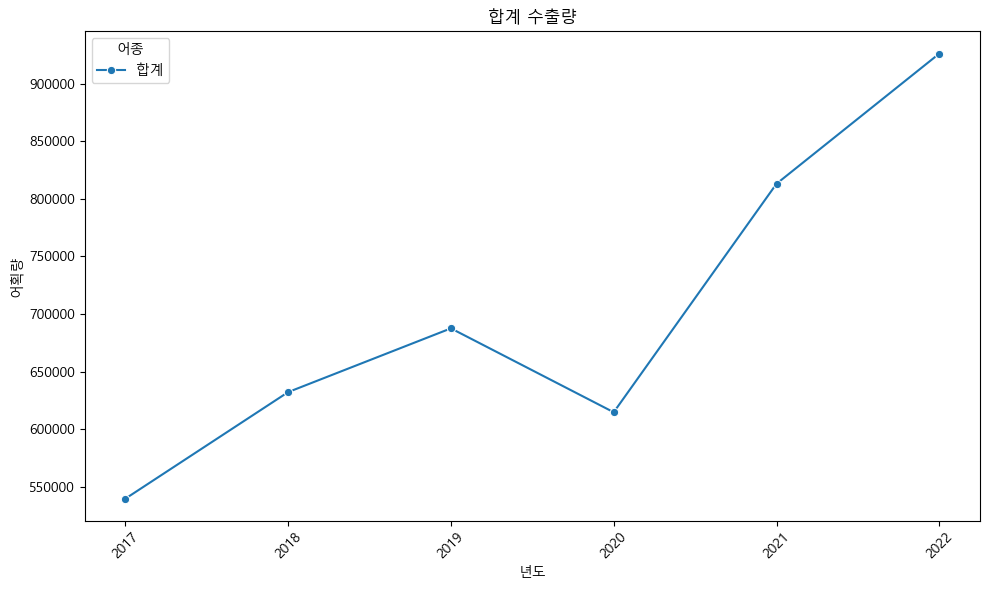

In [ ]:
# 합계 라인 그래프
export_reverse = export.reset_index().melt(id_vars = ['어종'], var_name = '년도', value_name = '어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
jellyfish_data = export_reverse[export_reverse['어종'] == '합계'] # 해파리에 대한 데이터만
print(jellyfish_data)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=jellyfish_data, x = '년도', y = '어획량', hue = '어종', marker = 'o')

# 그래프 꾸미기
plt.title('합계 수출량')
plt.xlabel('년도')
plt.ylabel('수출량(톤)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전
#plt.legend(title='어종')

# 그래프 표시
plt.tight_layout()
plt.show()

In [94]:
total_produce = pd.read_excel('./data/어업_생산량.xlsx', index_col=0)  # 첫번째 열(연도)을 인덱스로 생산량 데이터 읽기

In [95]:
total_produce.head()

,합계,소계,일반해면어업,천해양식업,원양어업,내수면어업
연도,,,,,,
1990,3198234.0,3163853.0,1471810.0,772731.0,919312.0,34381.0
1991,2906131.0,2875731.0,1226779.0,775419.0,873533.0,30400.0
1992,3200852.0,3166676.0,1206542.0,935478.0,1024656.0,34176.0
1993,3335916.0,3305729.0,1526139.0,1038119.0,741471.0,30187.0
1994,3476605.0,3445748.0,1486357.0,1072126.0,887265.0,30857.0


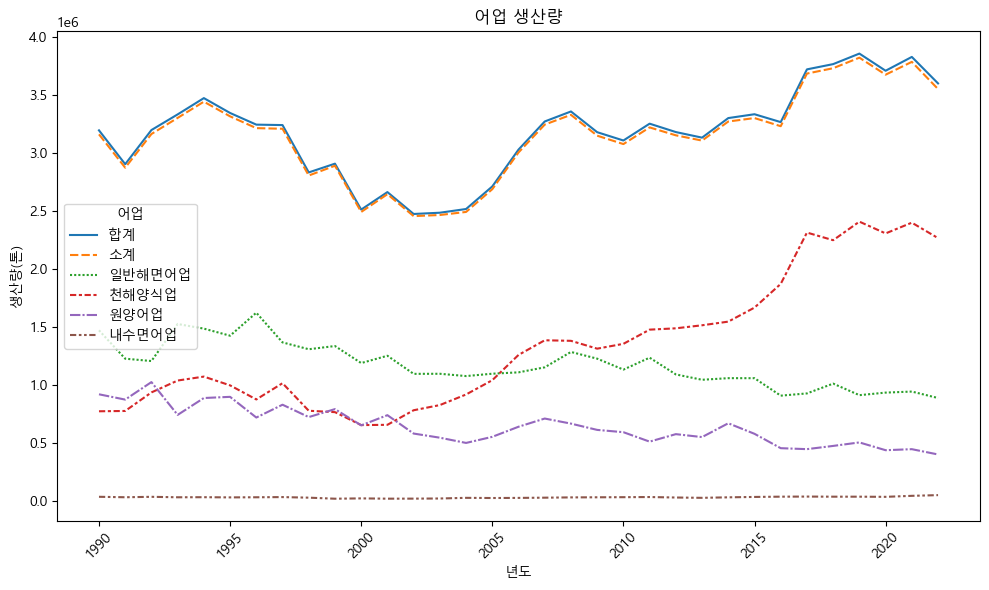

In [114]:
# 어업 생산량 기본 그래프 그리기
plt.figure(figsize = (10, 6))
sns.lineplot(data=total_produce)

# 그래프 꾸미기
plt.title('어업 생산량')
plt.xlabel('년도')
plt.ylabel('생산량(톤)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전
plt.legend(title='어업')

# 그래프 표시
plt.tight_layout()
plt.show()

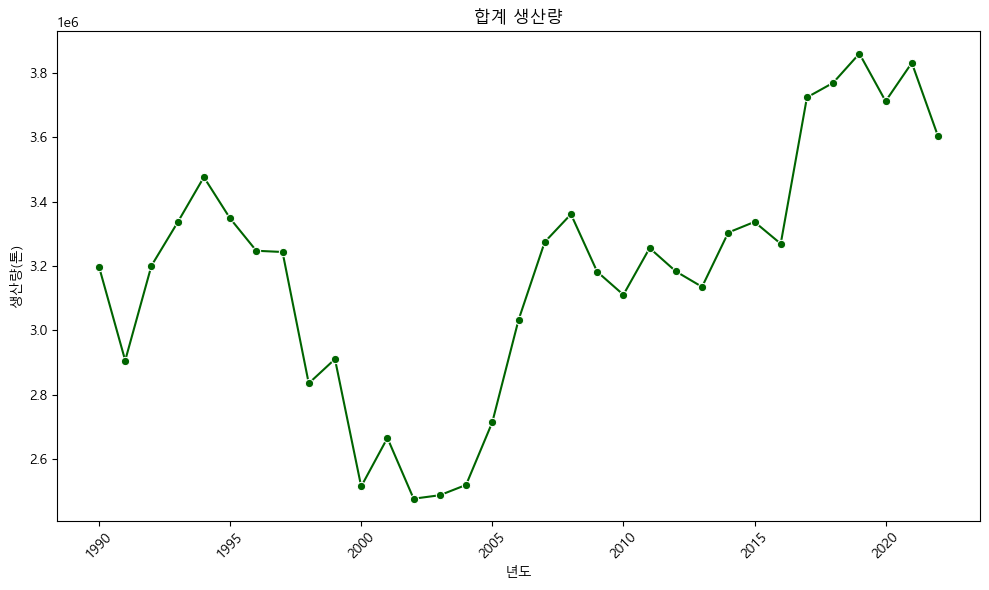

In [ ]:
# 어업 생산량 기본 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_produce['합계'], marker = 'o', color = 'darkgreen')

# 그래프 꾸미기
plt.title('합계 생산량')
plt.xlabel('년도')
plt.ylabel('생산량(톤)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전
#plt.legend(title='합계')

# 그래프 표시
plt.tight_layout()
plt.show()

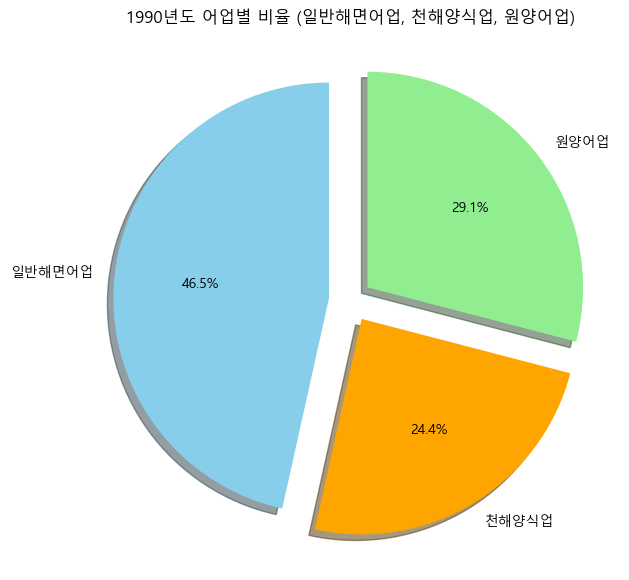

In [101]:
# 1990년도에 대한 소계 어업 파이 차트 그리기
year_2017 = total_produce.loc[1990, ["일반해면어업", "천해양식업", "원양어업"]] # 1990년도의 소계 어업들

# 파이 차트 그리기
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(7, 7))
plt.pie(year_2017, labels = year_2017.index, autopct = '%1.1f%%', explode = explode,
         startangle = 90, colors = ['skyblue', 'orange', 'lightgreen'], shadow = True)
plt.title('1990년도 어업별 비율 (일반해면어업, 천해양식업, 원양어업)')
plt.show()

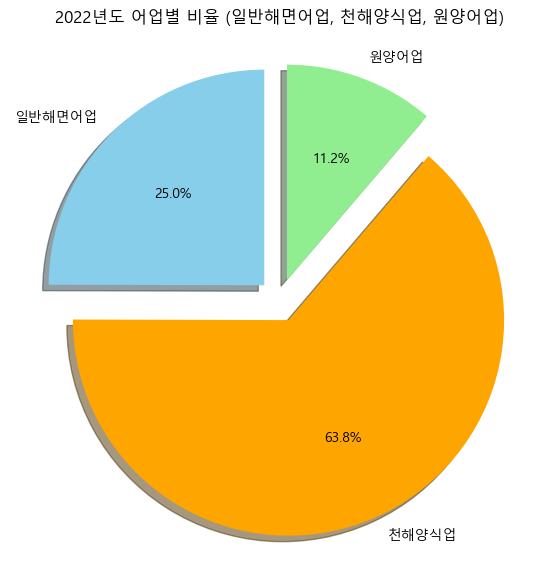

In [ ]:
# 2022년도에 대한 소계 어업 파이 차트 그리기
year_2022 = total_produce.loc[2022, ["일반해면어업", "천해양식업", "원양어업"]] # 1990년도의 소계 어업들

# 파이 차트 그리기
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(7, 7))
plt.pie(year_2022, labels = year_2017.index, autopct = '%1.1f%%', explode = explode,
         startangle = 90, colors = ['skyblue', 'orange', 'lightgreen'], shadow = True)
plt.title('2022년도 어업별 비율 (일반해면어업, 천해양식업, 원양어업)')
plt.show()

In [ ]:
# pandas가 알아서 엑셀 읽어서 데이터 만들고 딴다라 다 함
each_produce = pd.read_excel('./data/어업별_어획량.xlsx', index_col = 0)  # 첫번째 열(어업)을 인덱스로 수출 데이터 읽기
each_produce = each_produce.replace('..', 0)# .. 값을 0으로 변환
each_produce = each_produce.apply(lambda x: x.astype(int)) # 각 열에 대하여 float값을 소수점 버린 int 값으로 변환

C:\Users\USER\AppData\Local\Temp\ipykernel_29524\1722774272.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  each_produce = each_produce.replace('..', 0)# .. 값을 0으로 변환


In [144]:
each_produce

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
어업,,,,,,,,,,,,,
쌍끌이대형저인망어업,1976,2237,2122,1911,1694,1313,1241,1651,1503,1158,1043,1102,879
외끌이대형저인망어업,301,244,243,247,213,222,253,188,185,181,186,200,185
대형트롤어업,1235,1465,1724,1442,1548,1127,1625,931,852,729,741,654,187
동해구외끌이중형저인망어업,162,165,207,272,289,286,325,299,274,292,386,427,245
서남해구외끌이중형저인망어업,288,259,273,290,210,214,211,238,224,189,199,191,186
동해구중형트롤어업,753,1348,1211,1108,824,811,801,314,263,159,322,251,98
대형선망어업,8771,9791,8520,8978,7494,9070,8962,6781,9077,8325,7104,10505,10495
기선권현망어업,644,558,493,496,533,585,484,502,492,444,624,436,358
근해통발어업,246,205,246,350,248,283,282,322,274,246,245,237,260


In [130]:
# 합계 라인 그래프
export_reverse = export.reset_index().melt(id_vars=['어종'], var_name = '년도', value_name = '어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
jellyfish_data = export_reverse[export_reverse['어종'] == '합계'] # 해파리에 대한 데이터만
print(jellyfish_data)

     어종    년도         어획량
31   합계  2017  539512.003
63   합계  2018  632133.689
95   합계  2019  687534.040
127  합계  2020  614643.620
159  합계  2021  813169.431
191  합계  2022  926296.054


In [ ]:
# pandas가 알아서 엑셀 읽어서 데이터 만들고 딴다라 다 함
each_produce = pd.read_excel('./data/어업별_어획량.xlsx', index_col = 0)  # 첫번째 열(어업)을 인덱스로 수출 데이터 읽기

In [47]:
# 첫 행을 column 기준으로 잡고 df 만들기
wb = openpyxl.load_workbook('./data/수산물_수출입_품종별.xlsx') # 어종, 년도 - 중량(MT - Metric Ton)
ws = wb['어종별수출'] # 수출 데이터

data = [] # 데이터

first_row = [cell.value for cell in ws[1]] # 첫번째 열

for row in ws.iter_rows(min_row=2, values_only=True):  # 데이터 행마다 읽기
    data.append(row) # 데이터 추가


df = pd.DataFrame(data, columns=first_row) # 첫번째 열을 기준으로 한 데이터프레임
df.set_index(df.columns[0], inplace = True)

# 엑셀 파일 닫기
wb.close()